In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.losses import SparseCategoricalCrossentropy

In [2]:
#downloading the dataset from keras
(x_train,y_train), (x_test,y_test)=keras.datasets.mnist.load_data()

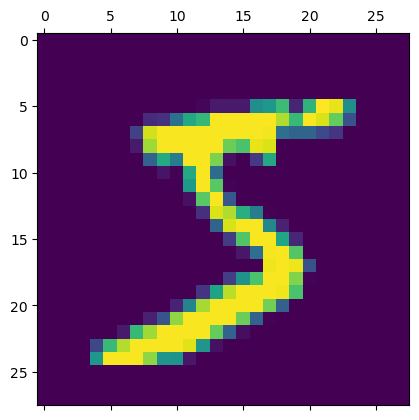

In [3]:
plt.matshow(x_train[0])

In [4]:
#flattening the 28 by 28 pixels to 1 dimension
x_train_flat=x_train.reshape(len(x_train), 28*28)

In [5]:
#testing whether it has flattened
x_test_flat=x_test.reshape(len(x_test), 784)

In [6]:
#feature scaling
x_train_flat=x_train_flat/255
x_test=x_test/255

In [7]:
#creating the model using softmax and logits 
model=keras.Sequential([
    keras.layers.Dense(180, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='linear'),
])

model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2209 - accuracy: 0.9344
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0925 - accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0634 - accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0491 - accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0361 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0307 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0249 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0186 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.018

In [8]:
logits = model(x_train_flat)
f_x=tf.nn.softmax(logits)

In [9]:
#testing the models accuracy
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 25.2672 - accuracy: 0.9757


[25.267244338989258, 0.9757000207901001]

In [10]:
import csv

In [11]:
#downloading an external dataset to test for overfitting
with open(r"./image_data_training.csv" , mode='r') as file:
    csvf=csv.reader(file)
    inp=[]
    ans=[]
    for line in csvf:
        jk=[]
        for i in range(2, 786):
            jk.append(int(line[i]))
        inp.append(jk)
        if line[-1]!='class':
            ans.append(int(line[-1]))
        
        

In [12]:
r_in=inp[1::]
r_ans=ans

In [13]:
#tranforming the dataset to be able to measure its accuracy 
real_inp=np.array(r_in)
real_out=np.array(r_ans)

In [14]:
model.evaluate(real_inp, real_out)

1876/1876 [==============================] - 5s 3ms/step - loss: 3.6324 - accuracy: 0.9929


[3.6324195861816406, 0.9929012060165405]

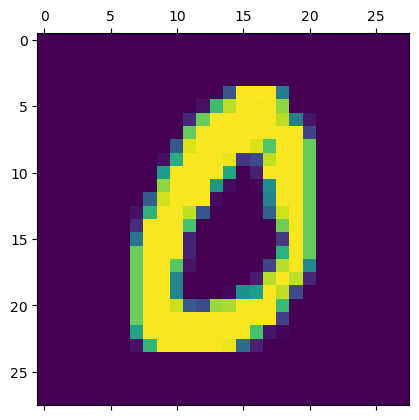

In [15]:
r_check=np.reshape(real_inp[0],(-1,28))
plt.matshow(r_check)

In [16]:
#testing with visual input
r_test=np.reshape(real_inp[0], (-1,784))
r_test.shape
y_predict=model.predict(r_test)
np.argmax(y_predict)

1/1 [==============================] - 0s 119ms/step


0